## 预实验代码如下

In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
K562_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Aiden_K562_500000.npz')
print(K562_data['col'][-2:])#6207 最后一位是M可以忽略
pos = np.zeros(25,dtype = np.int64) #对应1-22号染色体和X，Y染色体位置，最后一位是Y染色体终止位

for i in range(1,25): #找出不同染色体区域
    if i<23:        
        pos[i-1] = np.where(K562_data['col'] == 'chr'+str(i)+'-0')[0][0]
    else:
        if i == 23:
            pos[i-1] = np.where(K562_data['col'] == 'chrX-0')[0][0]
        else:
            pos[i-1] = np.where(K562_data['col'] == 'chrY-0')[0][0]
pos[-1] = 6206 #Y终止位
diff = np.diff(pos) #每条染色体的矩阵规模
print(pos)
print(diff)

Eig_value_list = np.zeros((25,25))#两两组成交互矩阵，求特征值分布


i = 0 #先计算1号染色体与其他染色体作用的矩阵 test
fig, axs = plt.subplots(4, 6, figsize=(15, 15)) #可视化观察 要画23个图
k=0
l=0
for j in range(0,24):
    if i==j:
        continue
    total_size = diff[i]+diff[j]
    M = np.zeros((total_size,total_size))
    M[0:diff[i]-1,diff[i]:total_size-1] = K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[j]:pos[j]+diff[j]-1]
    M[diff[i]:total_size-1,0:diff[i]-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[i]:pos[i]+diff[i]-1]
    M[0:diff[i]-1,0:diff[i]-1]=K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[i]:pos[i]+diff[i]-1]
    M[diff[i]:total_size-1,diff[i]:total_size-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[j]:pos[j]+diff[j]-1]
    eigenvalue,eigenvector = np.linalg.eig(M)
#     Eig_value_list[i,j] = eigenvalue
#    x = eigenvalue[np.logical_and(abs(eigenvalue)<100,abs(eigenvalue)>1e-8)]
    x = eigenvalue
    axs[(j-1)//6,(j-1)%6].hist(x,20)
    
print(M[0:10,0:10])
# M = np.zeros((596,596))
# M[0:498,499:499+97-1] = K562_data['hic'][0:498,5576:5672]
# M[499:499+97-1,0:498] = K562_data['hic'][5576:5672,0:498]
# M == M.T

# M1 = np.zeros((986,986))
# M1[0:498,499:985] = K562_data['hic'][0:498,499:985]
# M1[499:985,0:498] = K562_data['hic'][499:985,0:498]
# M1 == M1.T

In [91]:
eigenvalue, eigenvector = np.linalg.eig(M)
eigenvalue1, eigenvector1 = np.linalg.eig(M1)

In [ ]:
x = eigenvalue[np.logical_and(abs(eigenvalue)<100,abs(eigenvalue)>1e-8)]
print(x)
plt.hist(x,20)
x1 = eigenvalue1[np.logical_and(abs(eigenvalue1)<100,abs(eigenvalue1)>1e-8)]
print(x1)
plt.hist(x1,20)


(array([11., 18., 20., 24., 29., 26., 31., 31., 31., 33., 31., 32., 30.,
        29., 28., 25., 24., 22., 16.,  9.]),
 array([-62.49696062, -56.18238899, -49.86781735, -43.55324571,
        -37.23867408, -30.92410244, -24.6095308 , -18.29495917,
        -11.98038753,  -5.66581589,   0.64875575,   6.96332738,
         13.27789902,  19.59247066,  25.90704229,  32.22161393,
         38.53618557,  44.8507572 ,  51.16532884,  57.47990048,
         63.79447211]),
 <a list of 20 Patch objects>)

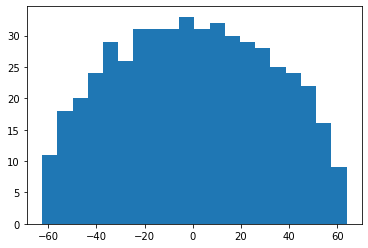

In [8]:
A = np.random.normal(0,1,(500,500))
B = A + A.T

eigenvalue_B, eigenvector_B = np.linalg.eig(B)
plt.hist(eigenvalue_B,20)

(array([3., 4., 4., 4., 5., 7., 4., 7., 7., 7., 6., 6., 5., 6., 6., 6., 5.,
        3., 3., 2.]),
 array([-2.76857478e+01, -2.49160891e+01, -2.21464304e+01, -1.93767717e+01,
        -1.66071130e+01, -1.38374543e+01, -1.10677956e+01, -8.29813691e+00,
        -5.52847821e+00, -2.75881951e+00,  1.08391862e-02,  2.78049789e+00,
         5.55015659e+00,  8.31981529e+00,  1.10894740e+01,  1.38591327e+01,
         1.66287914e+01,  1.93984501e+01,  2.21681088e+01,  2.49377675e+01,
         2.77074262e+01]),
 <a list of 20 Patch objects>)

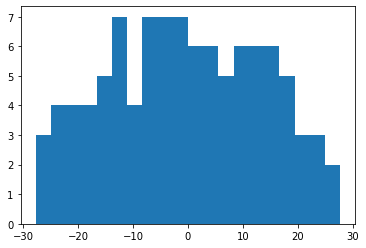

(array([11., 18., 20., 24., 29., 26., 31., 31., 31., 33., 31., 32., 30.,
        29., 28., 25., 24., 22., 16.,  9.]),
 array([-62.49696062, -56.18238899, -49.86781735, -43.55324571,
        -37.23867408, -30.92410244, -24.6095308 , -18.29495917,
        -11.98038753,  -5.66581589,   0.64875575,   6.96332738,
         13.27789902,  19.59247066,  25.90704229,  32.22161393,
         38.53618557,  44.8507572 ,  51.16532884,  57.47990048,
         63.79447211]),
 <a list of 20 Patch objects>)

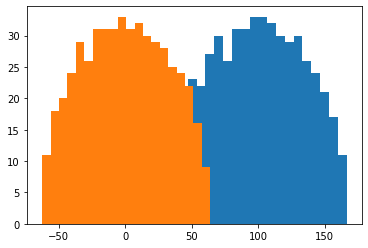

In [15]:
x = np.random.normal(100,10,(500,))
C = np.diag(x)
C+B

eigenvalue_BC, eigenvector_BC = np.linalg.eig(C-B)
plt.hist(eigenvalue_BC,20)
plt.hist(eigenvalue_B,20)

In [15]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
K562_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Aiden_K562_500000.npz')
print(K562_data['col'][-2:])#6207 最后一位是M可以忽略
pos = np.zeros(25,dtype = np.int64) #对应1-22号染色体和X，Y染色体位置，最后一位是Y染色体终止位

for i in range(1,25): #找出不同染色体区域
    if i<23:        
        pos[i-1] = np.where(K562_data['col'] == 'chr'+str(i)+'-0')[0][0]
    else:
        if i == 23:
            pos[i-1] = np.where(K562_data['col'] == 'chrX-0')[0][0]
        else:
            pos[i-1] = np.where(K562_data['col'] == 'chrY-0')[0][0]
pos[-1] = 6206 #Y终止位
diff = np.diff(pos) #每条染色体的矩阵规模
print(pos)
print(diff)

Eig_value_list = np.zeros((25,25))#两两组成交互矩阵，求特征值分布


i = 16 #先计算1号染色体与其他染色体作用的矩阵 test
#fig, axs = plt.subplots(4, 6, figsize=(15, 15)) #可视化观察 要画23个图
k=0
l=0
for j in range(0,24):
    if i==j:
        continue
    total_size = diff[i]+diff[j]
    M = np.zeros((total_size,total_size))
    M[0:diff[i]-1,diff[i]:total_size-1] = K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[j]:pos[j]+diff[j]-1]
    M[diff[i]:total_size-1,0:diff[i]-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[i]:pos[i]+diff[i]-1]
    M[M<10] = 0 
    print(len(M.nonzero()[0]))
    print(M[0:10,163:173])
    print("Trance is :",M.trace())
#    eigenvalue,eigenvector = np.linalg.eig(M)
#     Eig_value_list[i,j] = eigenvalue
#    x = eigenvalue[np.logical_and(abs(eigenvalue)<100,abs(eigenvalue)>1e-8)]
#    axs[(j-1)//6,(j-1)%6].hist(x,20)
    


['chrY-59000000' 'chrM-0']
[   0  499  986 1383 1766 2128 2471 2790 3083 3366 3638 3909 4177 4408
 4623 4829 5010 5173 5330 5449 5576 5673 5776 6087 6206]
[499 487 397 383 362 343 319 293 283 272 271 268 231 215 206 181 163 157
 119 127  97 103 311 119]
22348
[[ 0. 16. 12.  0.  0. 10.  0. 11.  0.  0.]
 [ 0. 17. 14.  0. 16.  0. 11. 13.  0.  0.]
 [ 0. 19. 30. 17. 10.  0.  0.  0. 16.  0.]
 [ 0. 15. 19. 26.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 12. 17. 16.  0.  0. 14.  0.  0.]
 [ 0.  0. 16. 12. 13.  0. 13. 11.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 13.  0.]
 [ 0.  0. 14. 22. 10.  0.  0. 12.  0.  0.]
 [ 0.  0. 15. 12. 10.  0.  0.  0.  0.  0.]
 [ 0.  0. 26. 13. 10.  0.  0.  0.  0.  0.]]
Trance is : 0.0
3906
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

In [32]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
K562_data = np.load('/home/qyang/Documents/projects/HiC_translocation/Data/Aiden_K562_500000.npz')
print(K562_data['col'][-2:])#6207 最后一位是M可以忽略
print(K562_data['hic'].trace())
#sns.heatmap(K562_data['hic'])

['chrY-59000000' 'chrM-0']
63674393


In [25]:
import pickle
with open('/home/qyang/Documents/projects/HiC_translocation/Data/transloc_table.pkl','rb') as f:
   full_table = pickle.load(f) 

In [47]:
type(full_table)
full_table[0:16]
# full_table[0:5]['boxes']

,name,file,chri,chrj,boxes,objs,clear
0,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr1,chr20,"[[52, 120, 215, 244]]",[1],[1]
1,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr3,chr10,"[[0, 170, 0, 96]]",[1],[1]
2,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr3,chr18,"[[0, 43, 271, 390]]",[1],[1]
3,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr9,chr13,"[[0, 192, 53, 56], [0, 192, 64, 77]]","[1, 2]",[1]
4,K562,/data/HiCAT/hic_mats/Aiden_K562_500000.npz,chr12,chr21,"[[28, 73, 45, 262]]",[1],[1]
5,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr3,chr20,"[[0, 52, 139, 390]]",[1],[1]
6,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr8,chr11,"[[0, 179, 246, 287]]",[1],[1]
7,A549,/data/HiCAT/hic_mats/Dekker_A549_500000.npz,chr15,chr19,"[[44, 113, 0, 32], [44, 113, 60, 162]]","[1, 2]","[1, 1]"
8,CAKI2,/data/HiCAT/hic_mats/Dekker_CAKI2_500000.npz,chr1,chr15,"[[138, 158, 0, 138]]",[1],[1]
9,CAKI2,/data/HiCAT/hic_mats/Dekker_CAKI2_500000.npz,chr2,chr3,"[[257, 390, 0, 460], [303, 353, 321, 405]]","[1, 2]","[1, 1]"


268 97
M中非零元素个数： 33318
M对角线和，M形状，M最大值： 0.0 (365, 365) 999.0

 size of M： (365, 365)


<AxesSubplot:>

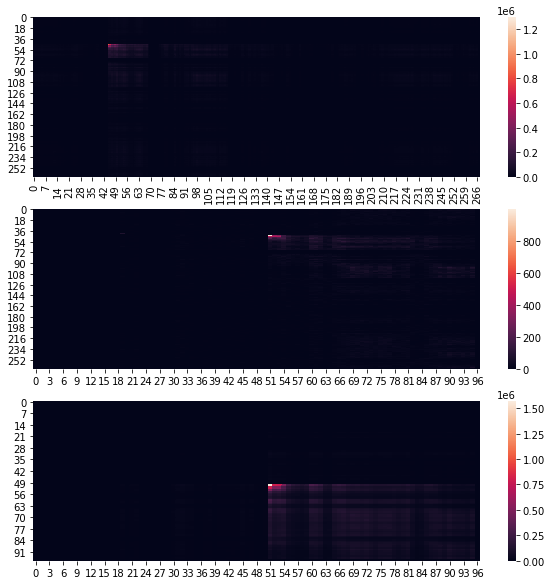

In [45]:
## 求邻接矩阵的拉普拉斯矩阵
## 非标准化的求法
def unnormalized_laplacian(adj_matrix):
# 先求度矩阵
    R = np.sum(adj_matrix, axis=1)
    degreeMatrix = np.diag(R)
    return degreeMatrix - adj_matrix

## 求邻接矩阵的拉普拉斯矩阵
## 标准化的求法
def normalized_laplacian(adj_matrix):
    R = np.sum(adj_matrix, axis=1)
    R_sqrt = 1/np.sqrt(R)
    D_sqrt = np.diag(R_sqrt)
    I = np.eye(adj_matrix.shape[0])
    return I - D_sqrt * adj_matrix * D_sqrt

##去除对称矩阵中全是0的行列
def zero_delete(adj_matrix):
    degree_L = np.sum(adj_matrix,axis=1)
    adj_matrix = np.delete(adj_matrix,np.where(degree_L == 0),axis=0)
    adj_matrix = np.delete(adj_matrix,np.where(degree_L == 0),axis=1)
    return adj_matrix

#chr_i chr_j 互作矩阵提取
def chr_interaction_pick(A,i,j):
    total_size = diff[i]+diff[j]
    M = np.zeros((total_size,total_size))
    ##下面首先将染色体之间的交互存入临时矩阵M
    M[0:diff[i]-1,diff[i]:total_size-1] = K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[j]:pos[j]+diff[j]-1]
    M[diff[i]:total_size-1,0:diff[i]-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[i]:pos[i]+diff[i]-1]
 
    
i = 0
j = 19
i = 2
j = 17
i = 8
j = 12
i = 11
j = 20
print(diff[i],diff[j])
total_size = diff[i]+diff[j]
M = np.zeros((total_size,total_size))
##下面首先将染色体之间的交互存入临时矩阵M
M[0:diff[i]-1,diff[i]:total_size-1] = K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[j]:pos[j]+diff[j]-1]
M[diff[i]:total_size-1,0:diff[i]-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[i]:pos[i]+diff[i]-1]
##然后将染色体内的交互存入临时矩阵M
#M[0:diff[i]-1,0:diff[i]-1]=K562_data['hic'][pos[i]:pos[i]+diff[i]-1,pos[i]:pos[i]+diff[i]-1]
#M[diff[i]:total_size-1,diff[i]:total_size-1] = K562_data['hic'][pos[j]:pos[j]+diff[j]-1,pos[j]:pos[j]+diff[j]-1]
##想要过滤特别小的数值
#M[M<3] = 0 
print("M中非零元素个数：",len(M.nonzero()[0]))

##下两行删除
#print(M[diff[i]-1+50:diff[i]-1+130,diff[j]-1+210:diff[j]-1+250])
#print(M[diff[i]-1:diff[i]-1+49,diff[j]-1+210:diff[j]-1+250])
print("M对角线和，M形状，M最大值：",M.trace(),M.shape,M.max())
#degree_L = np.sum(M,axis=1)
#print('\n degree:',degree_L,'\n degree = 0: ',np.where(degree_L ==0)[0])
#M = np.delete(M,np.where(degree_L ==0)[0],axis = 0)
#M = np.delete(M,np.where(degree_L ==0)[0],axis = 1)

#M = zero_delete(M)
#print('degree:',degree_L)
print('\n size of M：', M.shape)
## 过滤较大的值
#M[M>150]=150

L = unnormalized_laplacian(M)
# eigValue_L,eigVector_L = np.linalg.eig(L)
# print(eigValue_L)
#plt.hist(eigValue_L)
#degree_L = np.sum(M,axis=1)
#np.diag(degree_L)

#M[M<5]=0
#plt.hist(M.ravel())
#tmp = K562_data['hic']
#tmp[tmp>400] =400

tmp = M[0:diff[i],diff[i]:diff[i]+diff[j]]
tmp2 = np.dot(tmp,tmp.T)
tmp3 = np.dot(tmp.T,tmp)
# comprare_tmp = M[499:626,499:626]
# print(tmp[215:220,52:90])
# print(comprare_tmp[52:90,52:90])
# print(M[215:220,215:220])
f,axs = plt.subplots(3,1,figsize=(10,10))
sns.heatmap(tmp2,ax= axs[0])
#plt.subplots(122)
sns.heatmap(tmp,ax= axs[1])
sns.heatmap(tmp3,ax = axs[2])
# sns.heatmap(M[215:220,215:220],ax=axs[2])
# M[M>1000]=1000
# sns.heatmap(M,ax=axs[3])
#print(len(M[0:diff[i],0:diff[i]].nonzero()[0]))

<AxesSubplot:>

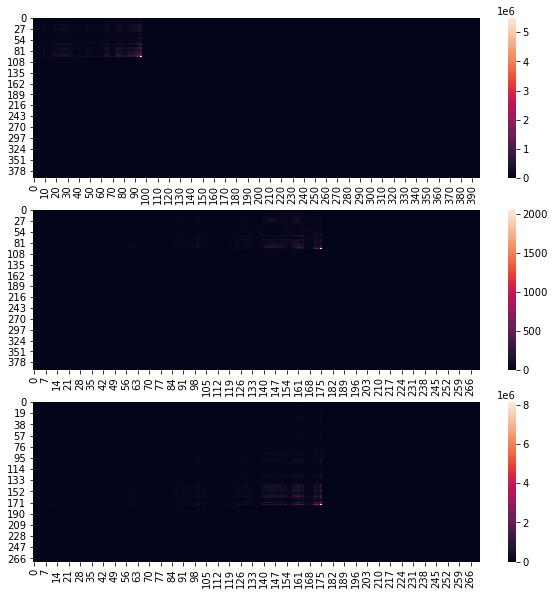

In [42]:
f,axs = plt.subplots(3,1,figsize=(10,10))
sns.heatmap(tmp2,ax= axs[0])
#plt.subplots(122)
sns.heatmap(tmp,ax= axs[1])
sns.heatmap(tmp3,ax = axs[2])
# sns.heatmap(M[215:220,215:220],ax=axs[2])
# M[M>1000]=1000
# sns.heatmap(M,ax=axs[3])
#print(len(M[0:diff[i],0:diff[i]].nonzero()[0]))

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, affinity = 'precomputed',assign_labels="discretize", random_state=0).fit_predict(M[499:626,0:499])
print(len(clustering.labels_))
print(clustering.labels_)
#sns.heatmap(M)
sns.heatmap(clustering.labels_.reshape(len(clustering.labels_)